# Perceptron

Answer all marked questions (❓).  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1

Consider the following linearly separable training set:

$\mathbf{x^{(1)}} =\begin{bmatrix} -1 \\ 0  \\ \end{bmatrix} $,  $\mathbf{x^{(2)}} =\begin{bmatrix} 0 \\ 0.25  \\ \end{bmatrix} $,   $\mathbf{x^{(3)}} =\begin{bmatrix} 1 \\ 1 \\ \end{bmatrix} $,      $\mathbf{x^{(4)}} =\begin{bmatrix} 1 \\ -1  \\ \end{bmatrix} $

$y^{(1)} = -1$, $y^{(2)} = +1$, $y^{(3)} = +1$, $y^{(4)} = -1$


In [2]:
# Define points
inputs = np.array([[-1, 0], [0, 0.25], [1, 1], [1, -1]])
labels = np.array([-1, 1, 1, -1])

num_examples, num_features = np.shape(inputs)

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

print(np.shape(inputs))

(4, 3)


❓ Let us use the perceptron algorithm to separate the two classes of points.

1. Initialize all weights to zero (including the bias) 
2. Assume $sign(z) = +1$ iff $z ≥ 0$, and $−1$ if $z < 0$ 
3. Complete provided fucntion `perceptron_epoch` which performs one epoch of the perceptron algorithm
4. Use a learning rate of one
5. Apply algorithm until convergence 

Note: You can use provided function `plot_separation_line` to see the points and the separating hyperplane in each epoch

In [13]:
"""
Function to execute perceptron epoch. 

Receives inputs, labels, previous weights (w) and learning rate(eta)

Should output number of mistakes and new weights
"""

def perceptron_epoch(inputs, labels, w, eta):
    
   
    mistakes = 0
    for x, y in zip(inputs, labels):
        # Sign function.
        y_hat = 1 if w.dot(x) >= 0 else -1
        if y_hat != y:
            mistakes += 1
            w += eta * y * x
            print(w)

    
    print("Mistakes: %d" % mistakes)
    return mistakes

In [4]:
# Plot separation line associated with model w, along with the data.
def plot_separation_line(inputs, labels, w):
    # Plot data.
    plt.plot(inputs[labels == -1, 1], inputs[labels == -1, 2], "b.")
    plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")
    # Plot model separation line.
    x1 = np.array([-2, 2])
    x2 = (-w[0] - w[1]*x1) / w[2]
    plt.plot(x1, x2, 'k--')
    plt.show()

Epoch 1
[-1.  1.  0.]
[0.   1.   0.25]
[-1.    0.    1.25]
Mistakes: 3


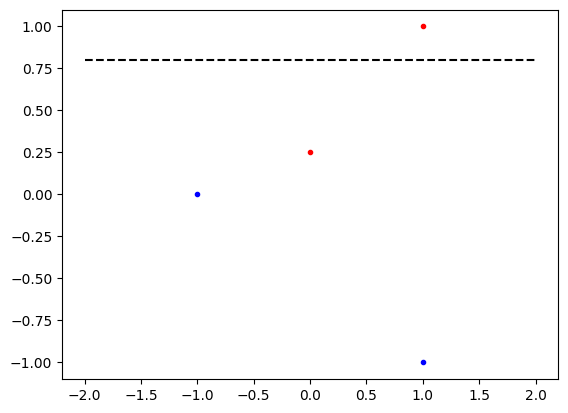

Epoch 2
[0.  0.  1.5]
Mistakes: 1


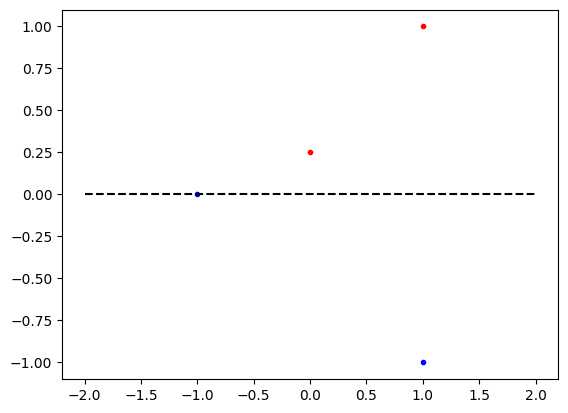

Epoch 3
[-1.   1.   1.5]
[0.   1.   1.75]
Mistakes: 2


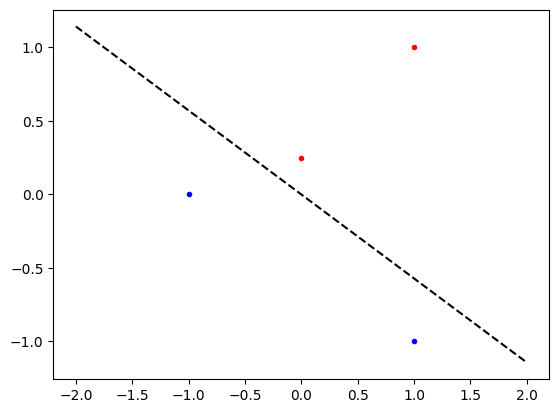

Epoch 4
Mistakes: 0


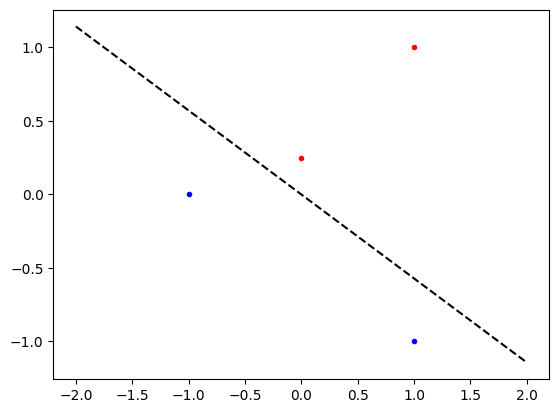

In [14]:
# TODO: Inititalize weights and apply algorithm until convergence
w = np.zeros(num_features + 1)

# Learning rate.
eta = 1  

mistakes = 1
epoch = 1
while mistakes > 0 and epoch <= 10:
    print("Epoch %d" % epoch)
    mistakes= perceptron_epoch(inputs, labels, w, eta)
    plot_separation_line(inputs, labels, w)
    epoch += 1

❓ What is the perceptron output for query point $\begin{bmatrix} 0 && 1   \end{bmatrix}^T$?

In [18]:
# TODO
x_new = np.array([1,0,1])

y_hat_new = 1 if w.dot(x_new) >= 0 else -1

print(y_hat_new)

1


❓ Change the initialization of weights and biases to be random with a standard normal distribution $\mathcal{N}(0,1)$. Try multiple times. Does it always converge?

*Hint:* `np.random.randn`

Epoch 1
[2.72919099 5.06450174 4.97702484]
[2.72919099 5.06450174 4.97702484]
[2.72919099 5.06450174 4.97702484]
[2.72919099 5.06450174 4.97702484]
[2.72919099 5.06450174 4.97702484]
[ 4.72919099 10.77334278  8.29169088]
[ 6.72919099 15.0514104  13.31245896]
[ 8.72919099 14.59013924 14.09085742]
[ 8.72919099 14.59013924 14.09085742]
[ 8.72919099 14.59013924 14.09085742]
[10.72919099 16.20047266 18.14773272]
[10.72919099 16.20047266 18.14773272]
[10.72919099 16.20047266 18.14773272]
[10.72919099 16.20047266 18.14773272]
[12.72919099 23.33038283 20.48051223]
[14.72919099 28.32069136 22.45120674]
[16.72919099 32.1666449  26.09037007]
[16.72919099 32.1666449  26.09037007]
[18.72919099 37.09533311 27.74840393]
[20.72919099 42.95504397 29.3559551 ]
Mistakes: 20
[20.72919099 42.95504397 29.3559551 ]


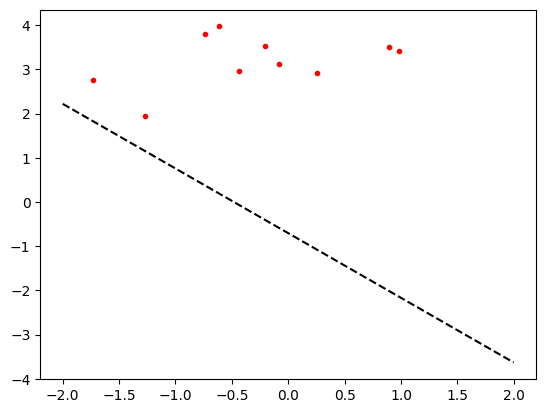

Epoch 2
[22.72919099 47.68284127 34.08003682]
[22.72919099 47.68284127 34.08003682]
[22.72919099 47.68284127 34.08003682]
[22.72919099 47.68284127 34.08003682]
[22.72919099 47.68284127 34.08003682]
[24.72919099 53.39168231 37.39470287]
[26.72919099 57.66974993 42.41547094]
[28.72919099 57.20847877 43.1938694 ]
[28.72919099 57.20847877 43.1938694 ]
[28.72919099 57.20847877 43.1938694 ]
[30.72919099 58.81881219 47.2507447 ]
[30.72919099 58.81881219 47.2507447 ]
[30.72919099 58.81881219 47.2507447 ]
[30.72919099 58.81881219 47.2507447 ]
[32.72919099 65.94872236 49.58352421]
[34.72919099 70.93903089 51.55421872]
[36.72919099 74.78498443 55.19338206]
[36.72919099 74.78498443 55.19338206]
[38.72919099 79.71367264 56.85141591]
[40.72919099 85.57338351 58.45896708]
Mistakes: 20
[40.72919099 85.57338351 58.45896708]


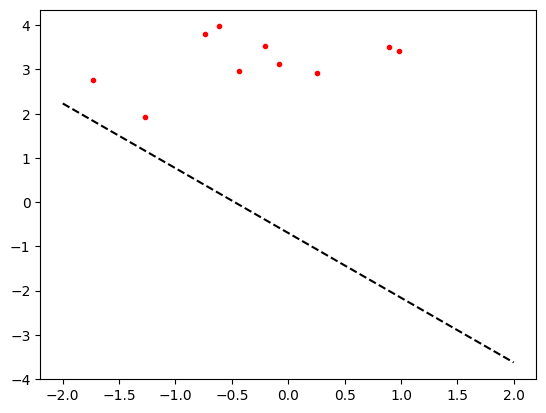

Epoch 3
[42.72919099 90.3011808  63.1830488 ]
[42.72919099 90.3011808  63.1830488 ]
[42.72919099 90.3011808  63.1830488 ]
[42.72919099 90.3011808  63.1830488 ]
[42.72919099 90.3011808  63.1830488 ]
[44.72919099 96.01002184 66.49771485]
[ 46.72919099 100.28808946  71.51848292]
[48.72919099 99.82681831 72.29688138]
[48.72919099 99.82681831 72.29688138]
[48.72919099 99.82681831 72.29688138]
[ 50.72919099 101.43715172  76.35375668]
[ 50.72919099 101.43715172  76.35375668]
[ 50.72919099 101.43715172  76.35375668]
[ 50.72919099 101.43715172  76.35375668]
[ 52.72919099 108.56706189  78.68653619]
[ 54.72919099 113.55737042  80.6572307 ]
[ 56.72919099 117.40332396  84.29639404]
[ 56.72919099 117.40332396  84.29639404]
[ 58.72919099 122.33201217  85.95442789]
[ 60.72919099 128.19172304  87.56197907]
Mistakes: 20
[ 60.72919099 128.19172304  87.56197907]


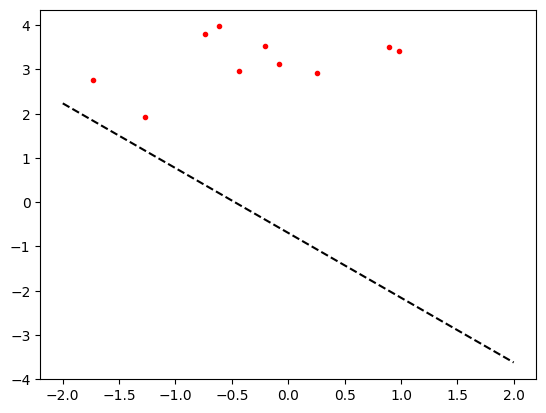

Epoch 4
[ 62.72919099 132.91952033  92.28606078]
[ 62.72919099 132.91952033  92.28606078]
[ 62.72919099 132.91952033  92.28606078]
[ 62.72919099 132.91952033  92.28606078]
[ 62.72919099 132.91952033  92.28606078]
[ 64.72919099 138.62836138  95.60072683]
[ 66.72919099 142.90642899 100.6214949 ]
[ 68.72919099 142.44515784 101.39989336]
[ 68.72919099 142.44515784 101.39989336]
[ 68.72919099 142.44515784 101.39989336]
[ 70.72919099 144.05549125 105.45676867]
[ 70.72919099 144.05549125 105.45676867]
[ 70.72919099 144.05549125 105.45676867]
[ 70.72919099 144.05549125 105.45676867]
[ 72.72919099 151.18540142 107.78954817]
[ 74.72919099 156.17570995 109.76024268]
[ 76.72919099 160.02166349 113.39940602]
[ 76.72919099 160.02166349 113.39940602]
[ 78.72919099 164.9503517  115.05743987]
[ 80.72919099 170.81006257 116.66499105]
Mistakes: 20
[ 80.72919099 170.81006257 116.66499105]


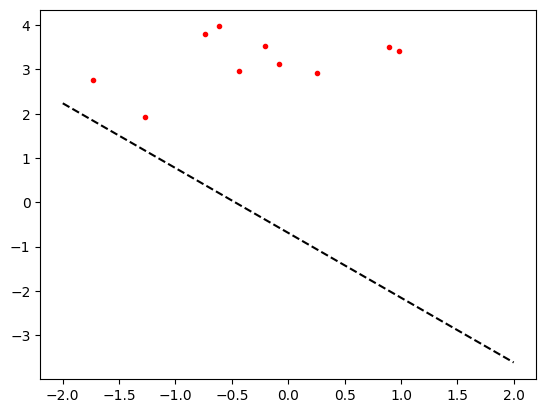

Epoch 5
[ 82.72919099 175.53785986 121.38907276]
[ 82.72919099 175.53785986 121.38907276]
[ 82.72919099 175.53785986 121.38907276]
[ 82.72919099 175.53785986 121.38907276]
[ 82.72919099 175.53785986 121.38907276]
[ 84.72919099 181.24670091 124.70373881]
[ 86.72919099 185.52476852 129.72450688]
[ 88.72919099 185.06349737 130.50290534]
[ 88.72919099 185.06349737 130.50290534]
[ 88.72919099 185.06349737 130.50290534]
[ 90.72919099 186.67383079 134.55978065]
[ 90.72919099 186.67383079 134.55978065]
[ 90.72919099 186.67383079 134.55978065]
[ 90.72919099 186.67383079 134.55978065]
[ 92.72919099 193.80374096 136.89256016]
[ 94.72919099 198.79404948 138.86325466]
[ 96.72919099 202.64000302 142.502418  ]
[ 96.72919099 202.64000302 142.502418  ]
[ 98.72919099 207.56869124 144.16045185]
[100.72919099 213.4284021  145.76800303]
Mistakes: 20
[100.72919099 213.4284021  145.76800303]


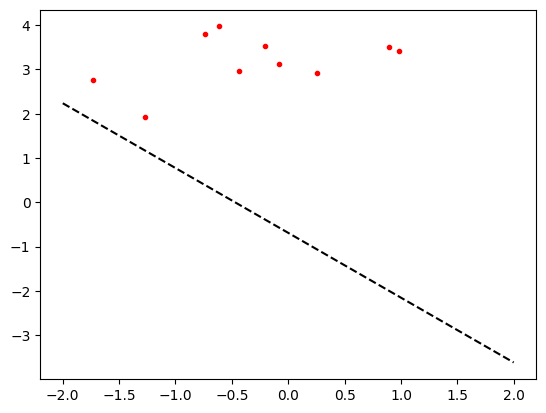

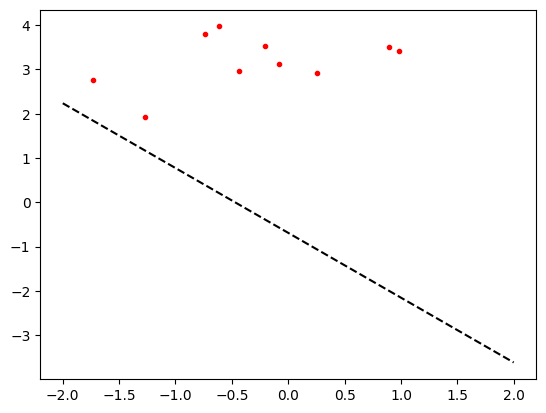

In [21]:
# TODO
w = np.random.randn(num_features + 1)

# Learning rate.
eta = 1  
    
# Run 5 epochs of perceptron.
for epoch in range(5):
    print("Epoch %d" % (epoch + 1))
    perceptron_epoch(inputs, labels, w, eta)
    print(w)
    plot_separation_line(inputs, labels, w)

# Plot separation line.
plot_separation_line(inputs, labels, w)

## Question 2 

Let us generate a balanced dataset with 30 examples in $\mathbb{R}^2$ and 3 classes. 
Assume each of the 10 inputs associated to class $k \in \{0,1,2\}$ is generated as $x \sim \mathcal{N}(\mu_k, \sigma_k^2 I)$, with $\sigma_0=\sigma_1=\sigma_2 = 1$, 
$\mu_0 = [0, 0]^\top$, $\mu_1 = [0, 3]^\top$, and $\mu_2 = [2, 2]^\top$.

❓ Plot the data

In [19]:
inputs0 = np.array([0, 0]) + np.random.randn(10, 2)
inputs1 = np.array([0, 3]) + np.random.randn(10, 2)
inputs2 = np.array([2, 2]) + np.random.randn(10, 2)

inputs = np.concatenate([inputs0, inputs1, inputs2], axis=0)

labels = np.array([0]*10 + [1]*10 + [2]*10)

# Shuffling observations
ind = np.random.permutation(30)
inputs = inputs[ind, :]
labels = labels[ind]

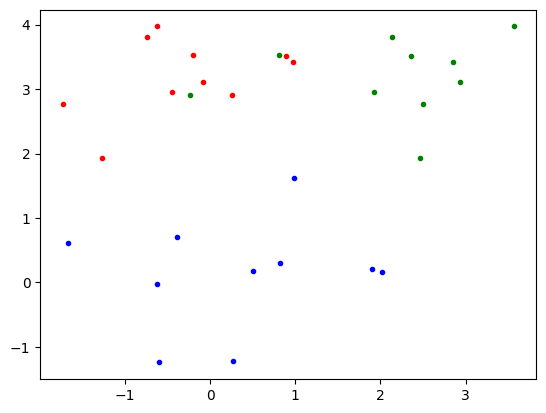

In [20]:
# TODO: plot data
num_examples, num_features = np.shape(inputs)
num_labels = np.max(labels) + 1

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

plt.plot(inputs[labels == 0, 1], inputs[labels == 0, 2], "b.")
plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")
plt.plot(inputs[labels == 2, 1], inputs[labels == 1, 2], "g.")

❓ Implement the multi-class perceptron algorithm by completing the `multi_class_perceptron_epoch` function. 

❓ Complete function `multi_class_classify` so that it provides the predicted labels given the inputs and the weights.

❓ Create or import a function that computes accuracy given the arrays of predicted and correct labels.

❓ Run 100 iterations of the algorithm, initializing all the weights to zero and using a learning rate of one. Save the accuracy of each epoch in a list. 

❓ What is the training accuracy (fraction of points that are correctly classified)?

❓ Plot the accuracies over epochs.

Note: Don't forget you have to augment the `inputs` with a dimension for the bias!

In [22]:
def multi_class_perceptron_epoch(inputs, labels, W, eta=1):
    mistakes = 0
    for x, y in zip(inputs, labels):
        
        # TODO: complete with perceptron algorithm
        y_hat = np.argmax(W.dot(x))
        if y_hat != y:
            mistakes += 1
            # Perceptron update.
            W[y, :] += eta * x
            W[y_hat, :] -= eta * x
        #pass
    print("Mistakes: %d" % mistakes)
    return W

In [23]:
def multi_class_classify(inputs, W):
    
    # TODO: complete 
    predicted_labels = []
    for x in inputs:
        y_hat = np.argmax(W.dot(x))
        predicted_labels.append(y_hat)
    predicted_labels = np.array(predicted_labels)
    return predicted_labels

In [24]:
# TODO: function to compute accuracy
def evaluate(predicted_labels, gold_labels):
    accuracy = np.mean(predicted_labels == gold_labels)
    return accuracy

Epoch 1
Mistakes: 13
Accuracy (training set): 0.833333

Epoch 2
Mistakes: 10
Accuracy (training set): 0.800000

Epoch 3
Mistakes: 7
Accuracy (training set): 0.833333

Epoch 4
Mistakes: 7
Accuracy (training set): 0.866667

Epoch 5
Mistakes: 4
Accuracy (training set): 0.866667

Epoch 6
Mistakes: 4
Accuracy (training set): 0.866667

Epoch 7
Mistakes: 4
Accuracy (training set): 0.833333

Epoch 8
Mistakes: 6
Accuracy (training set): 0.833333

Epoch 9
Mistakes: 8
Accuracy (training set): 0.833333

Epoch 10
Mistakes: 4
Accuracy (training set): 0.833333

Epoch 11
Mistakes: 4
Accuracy (training set): 0.833333

Epoch 12
Mistakes: 5
Accuracy (training set): 0.766667

Epoch 13
Mistakes: 6
Accuracy (training set): 0.833333

Epoch 14
Mistakes: 6
Accuracy (training set): 0.833333

Epoch 15
Mistakes: 3
Accuracy (training set): 0.966667

Epoch 16
Mistakes: 3
Accuracy (training set): 0.833333

Epoch 17
Mistakes: 6
Accuracy (training set): 0.800000

Epoch 18
Mistakes: 8
Accuracy (training set): 0.866667


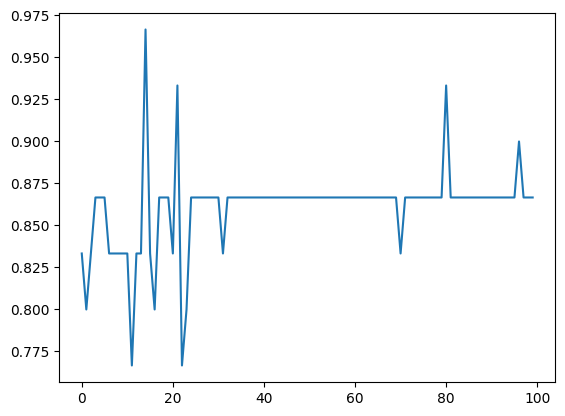

In [25]:
# TODO: Run algorithm, compute final accuracies, plot accuracies over epochs
# Initialize all weights to 0 (including the bias)
W = np.zeros((num_labels, num_features+1))  # num_labels x (num_features + 1)

# Learning rate.
eta = 1  
    
# Run 10 epochs of perceptron.
accuracies = []
for epoch in range(100):
    print("Epoch %d" % (epoch + 1))
    multi_class_perceptron_epoch(inputs, labels, W, eta)
    predicted_labels = multi_class_classify(inputs, W)
    accuracy = evaluate(predicted_labels, labels)
    print("Accuracy (training set): %f\n" % accuracy)
    accuracies.append(accuracy)
    
# Plot accuracies as a function of number of epochs.
plt.plot(range(100), accuracies)

## Question 3

Now it's time to try the perceptron on real data and see what happens.  

Let's load the UCI handwritten digits dataset using `scikit-learn`

In [26]:
from sklearn.datasets import load_digits
data = load_digits()

In [27]:
X = data['data']
y = data['target']

In [28]:
num_examples, num_features = np.shape(X)
num_labels = np.max(y)+1  # labels are 0, 1, ..., num_labels-1

# Augment points with a dimension for the bias.
X = np.concatenate([np.ones((num_examples, 1)), X], axis=1)

This is a dataset containing $1797$ 8x8 input images of digits, each corresponding to one out of 10 output classes. 
You can print the dataset description with `print(data.DESCR)
` and visualize some input examples:

<Figure size 640x480 with 0 Axes>

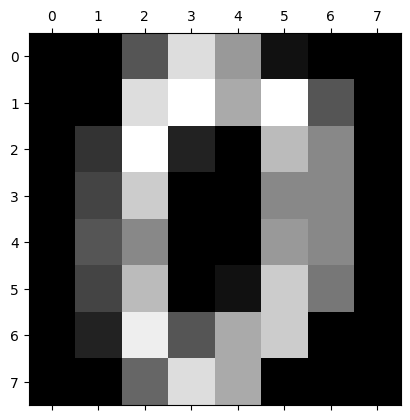

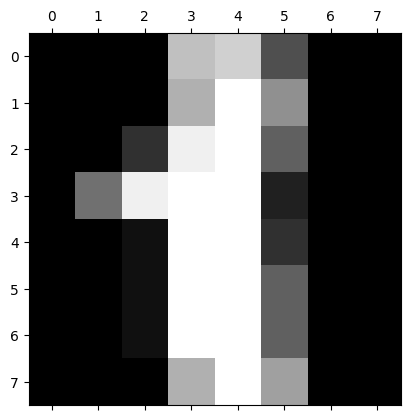

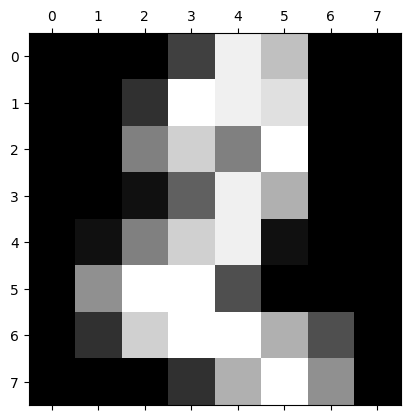

In [29]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(3):
    plt.matshow(data.images[i])
plt.show()

We randomly split this data into training (80\%) and test (20\%) partitions. This can be done with:

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

❓ Run your implementation of the multi-class perceptron algorithm on this dataset. Measure the training and test accuracy. 

In [32]:
# TODO
W = np.zeros((num_labels, num_features+1))
accuracies = []
for epoch in range(100):
    print("Epoch %d" % (epoch + 1))
    multi_class_perceptron_epoch(X_train, y_train, W, eta)
    predicted_labels = multi_class_classify(X_train, W)
    accuracy = evaluate(predicted_labels, y_train)
    print("Accuracy (training set): %f\n" % accuracy)
    accuracies.append(accuracy)

final_predict = multi_class_classify(X_test, W)
final_accuracy = evaluate(final_predict, y_test)
print("Accuracy (test set): %f\n" % final_accuracy)


Epoch 1
Mistakes: 329
Accuracy (training set): 0.888657

Epoch 2


Mistakes: 161
Accuracy (training set): 0.937370

Epoch 3
Mistakes: 120
Accuracy (training set): 0.956159

Epoch 4
Mistakes: 91
Accuracy (training set): 0.866388

Epoch 5
Mistakes: 89
Accuracy (training set): 0.941545

Epoch 6
Mistakes: 82
Accuracy (training set): 0.947112

Epoch 7
Mistakes: 73
Accuracy (training set): 0.961030

Epoch 8
Mistakes: 80
Accuracy (training set): 0.951287

Epoch 9
Mistakes: 83
Accuracy (training set): 0.934586

Epoch 10
Mistakes: 74
Accuracy (training set): 0.974252

Epoch 11
Mistakes: 52
Accuracy (training set): 0.949200

Epoch 12
Mistakes: 66
Accuracy (training set): 0.947112

Epoch 13
Mistakes: 55
Accuracy (training set): 0.971468

Epoch 14
Mistakes: 48
Accuracy (training set): 0.972164

Epoch 15
Mistakes: 50
Accuracy (training set): 0.974252

Epoch 16
Mistakes: 62
Accuracy (training set): 0.958246

Epoch 17
Mistakes: 57
Accuracy (training set): 0.950592

Epoch 18
Mistakes: 38
Accuracy (training set): 0.983299

Epoch 19
Mistakes: 50
Accuracy (training set)

Let's use `scikit-learn`'s implementation of the perceptron algorithm. You can check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to understand what hyperparameters they are using and why the performances are different

In [33]:
from sklearn.linear_model import Perceptron
clf = Perceptron(fit_intercept=False, shuffle=False)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9735560194850382
0.9583333333333334
